In [2]:
cd /content/drive/MyDrive/fastcampus/이커머스

/content/drive/MyDrive/fastcampus/이커머스


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 30)
pd.set_option("display.max_rows", 100)

In [4]:
df = pd.read_csv("galaxy.csv")

In [5]:
df.head(2)

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0


BuyItNow : 비교하지 않고 바로 구매할 수 있는 옵션 여부    
startprice : 시작가격  
carrier : 미국통신사  
color : 색상	  
productline	: 모델명   
noDescription	: 판매자가 제품에 대한 설명 기재 여부     
charCountDescription : 판매자가 제품에 대한 설명 기재 여부   
upperCaseDescription : 몇문장으로 구성이 되어 있는지   
sold : 판매되었는지 (target)  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1179 non-null   object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [7]:
df.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


startprice와 charCountDescription의 std가 높고, 75%와 max와의 차이가 있는 것으로 보아서 그래프로 데이터의 분포를 확인할 필요가 있다고 사료된다. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


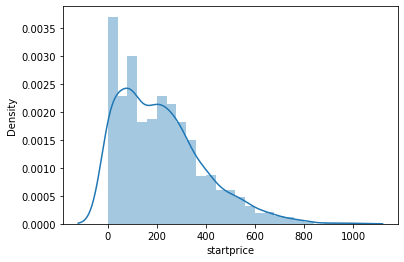

In [8]:
sns.distplot(df.startprice);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


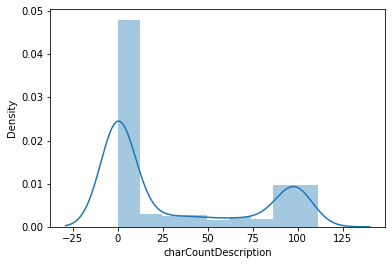

In [9]:
sns.distplot(df.charCountDescription);

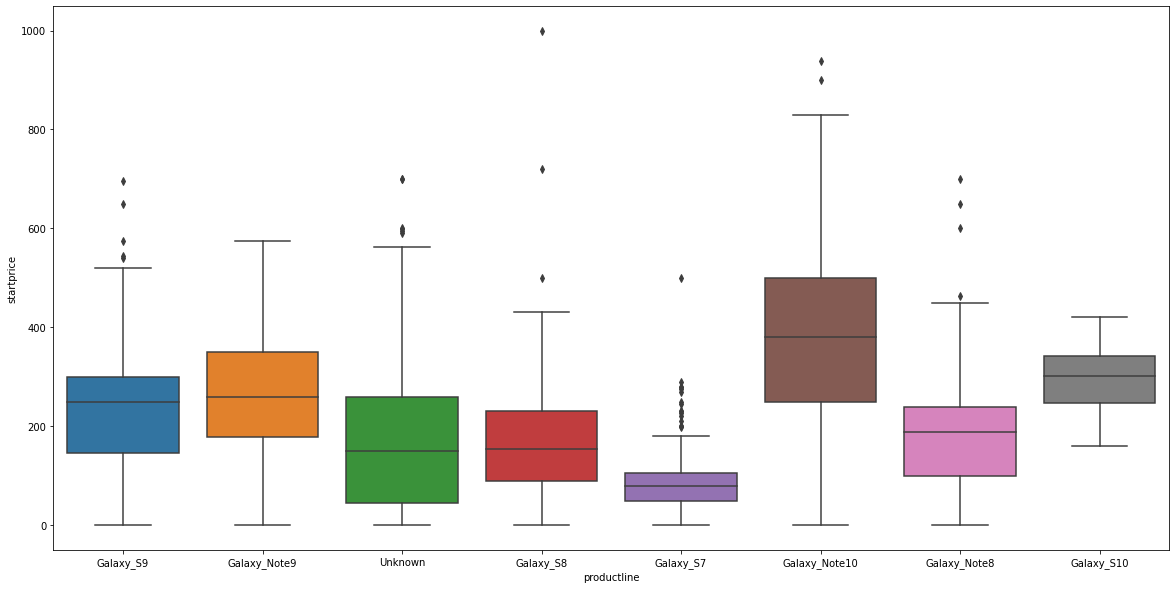

In [10]:
plt.figure(figsize=(20,10))
sns.boxplot(x="productline", y="startprice", data=df)

In [11]:
df.isnull().sum() / len(df)

BuyItNow                0.000000
startprice              0.000000
carrier                 0.206061
color                   0.399327
productline             0.000000
noDescription           0.000000
charCountDescription    0.000000
upperCaseDescription    0.000000
sold                    0.000000
dtype: float64

### 결측치 처리

In [12]:
print("df.carrier 총 길이", len(df.carrier))
print(df.carrier.value_counts())
print("---")
print("df.color 총 길이", len(df.color))
print(df.color.value_counts())

df.carrier 총 길이 1485
None               863
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64
---
df.color 총 길이 1485
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: color, dtype: int64


carrier의 경우, None이라는 값이 있는 것이 관측되었다. 공기계로 판매가 되는 것을 None 값으로 표기하는 것으로 사료됩니다. 공기계로 판매되는 숫자가 압도적으로 많지만, 이번에는 결측치를 Unknown이라는 값으로 대체하여 분석을 진행해보도록 하겠습니다.  
  
  color의 경우도 값을 직접 찾는 것은 어렵고, 신뢰성 있는 값으로 대체될 수 있다는 보장이 없기 때문에  결측치를 Unknown이라는 값으로 대체하여 분석을 진행해보도록 하겠습니다.  

In [13]:
df = df.fillna("Unknown")
df

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,Unknown,Galaxy_Note9,contains description,0,0,0
2,0,199.99,Unknown,Unknown,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
1480,0,89.50,AT&T,Unknown,Galaxy_S7,no description,96,2,0
1481,0,239.95,None,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,None,Space Gray,Galaxy_Note10,no description,93,1,0
1483,0,89.00,None,Midnight Black,Galaxy_S7,no description,92,2,1


In [14]:
# 달러의 특성상 cent 단위로 기재가 되기 때문에 끝자리가 0이 되기 맞춰주는 작업을 진행해보겠습니다. 
df["startprice"] = df.startprice.apply(lambda x: x * 100 if x % 1 == 0 else (x + 0.01) * 100)

In [15]:
# 정상적으로 변경된 것이 확인 됩니다. 
df.head(2)

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,20000.0,None,White,Galaxy_S9,contains description,0,0,1
1,0,23500.0,None,Unknown,Galaxy_Note9,contains description,0,0,0


In [16]:
# 이제 카테고리형 데이터를 처리해보도록 하겠습니다. 
df.select_dtypes(include=['object'])

,carrier,color,productline,noDescription
0,None,White,Galaxy_S9,contains description
1,None,Unknown,Galaxy_Note9,contains description
2,Unknown,Unknown,Unknown,no description
3,AT&T,Space Gray,Galaxy_Note9,contains description
4,None,Space Gray,Galaxy_S8,contains description
...,...,...,...,...
1480,AT&T,Unknown,Galaxy_S7,no description
1481,None,Midnight Black,Galaxy_S9,no description
1482,None,Space Gray,Galaxy_Note10,no description
1483,None,Midnight Black,Galaxy_S7,no description


In [17]:
for i in df.select_dtypes(include=['object']).columns:
  print(df[i].value_counts())

None               863
Unknown            306
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64
Unknown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: color, dtype: int64
Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: productline, dtype: int64
contains description    856
no description          629
Name: noDescription, dtype: int64


카테고리형 데이터를 살펴보았을 때 카테고리를 줄일 수 있는 것은 색상 정도로 관측이 됩니다. black이 다양한 이름으로 분포되어 있으나, 데이터 분석할때 반드시 디테일한 이름이 필요한 것으로 사료되지 않습니다. 이에, 색상을 black 이라는 이름으로 통해주도록 하겠습니다. 

In [18]:
df["color"][df.color.str.contains("Black")] = "Black"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df.color.value_counts()

Unknown       593
Black         332
White         328
Space Gray    180
Gold           52
Name: color, dtype: int64

In [20]:
df = pd.get_dummies(df, columns= df.select_dtypes(include=['object']).columns, drop_first=True)
df.shape

(1485, 21)

In [21]:
df.head(2)

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold,carrier_None,carrier_Sprint/T-Mobile,carrier_Unknown,carrier_Verizon,color_Gold,color_Space Gray,color_Unknown,color_White,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_no description
0,0,20000.0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,23500.0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split

X = df.drop("sold", axis=1)
y = df["sold"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1188, 20), (297, 20), (1188,), (297,))

In [40]:
accuracy_score_list = [] 
for i in range(2, 31):
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy_score_list.append(accuracy_score(y_test, y_pred))

max(accuracy_score_list)

0.7878787878787878

In [43]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
y_pred = model.predict(X_test)
y_pred.shape

(297,)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, y_pred)

0.7474747474747475

In [46]:
confusion_matrix(y_test, y_pred)

array([[144,  40],
       [ 35,  78]])

[Text(558.0, 570.7800000000001, 'BuyItNow <= 0.5\n0.499\n1188\n[615, 573]'),
 Text(279.0, 407.70000000000005, 'startprice <= 20850.0\n0.352\n644\n[497, 147]'),
 Text(139.5, 244.62, 'startprice <= 850.0\n0.432\n234\n[160, 74]'),
 Text(69.75, 81.53999999999996, '0.0\n3\n[0, 3]'),
 Text(209.25, 81.53999999999996, '0.426\n231\n[160, 71]'),
 Text(418.5, 244.62, 'upperCaseDescription <= 3.5\n0.293\n410\n[337, 73]'),
 Text(348.75, 81.53999999999996, '0.333\n318\n[251, 67]'),
 Text(488.25, 81.53999999999996, '0.122\n92\n[86, 6]'),
 Text(837.0, 407.70000000000005, 'startprice <= 14248.0\n0.34\n544\n[118, 426]'),
 Text(697.5, 244.62, 'startprice <= 5113.0\n0.179\n343\n[34, 309]'),
 Text(627.75, 81.53999999999996, '0.089\n215\n[10, 205]'),
 Text(767.25, 81.53999999999996, '0.305\n128\n[24, 104]'),
 Text(976.5, 244.62, 'productline_Unknown <= 0.5\n0.487\n201\n[84, 117]'),
 Text(906.75, 81.53999999999996, '0.472\n181\n[69, 112]'),
 Text(1046.25, 81.53999999999996, '0.375\n20\n[15, 5]')]

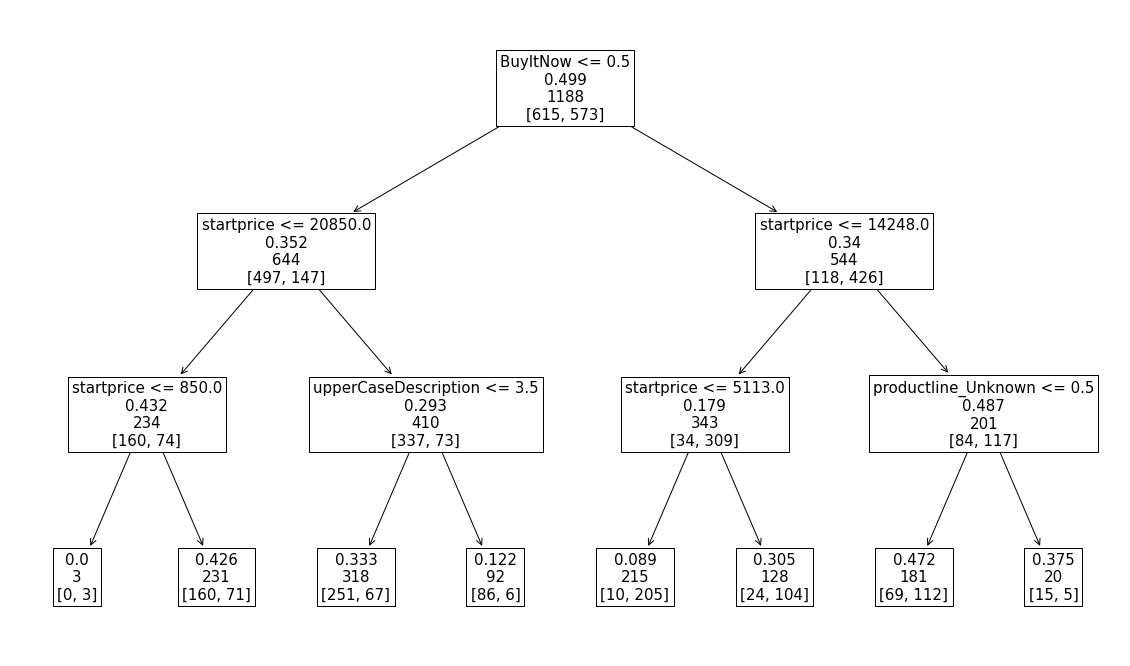

In [53]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,12))
plot_tree(model, feature_names=X_train.columns, fontsize=15, label=None)

[Text(558.0, 570.7800000000001, 'BuyItNow <= 0.5\ngini = 0.499\nsamples = 1188\nvalue = [615, 573]'),
 Text(279.0, 407.70000000000005, 'startprice <= 20850.0\ngini = 0.352\nsamples = 644\nvalue = [497, 147]'),
 Text(139.5, 244.62, 'startprice <= 850.0\ngini = 0.432\nsamples = 234\nvalue = [160, 74]'),
 Text(69.75, 81.53999999999996, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(209.25, 81.53999999999996, 'gini = 0.426\nsamples = 231\nvalue = [160, 71]'),
 Text(418.5, 244.62, 'upperCaseDescription <= 3.5\ngini = 0.293\nsamples = 410\nvalue = [337, 73]'),
 Text(348.75, 81.53999999999996, 'gini = 0.333\nsamples = 318\nvalue = [251, 67]'),
 Text(488.25, 81.53999999999996, 'gini = 0.122\nsamples = 92\nvalue = [86, 6]'),
 Text(837.0, 407.70000000000005, 'startprice <= 14248.0\ngini = 0.34\nsamples = 544\nvalue = [118, 426]'),
 Text(697.5, 244.62, 'startprice <= 5113.0\ngini = 0.179\nsamples = 343\nvalue = [34, 309]'),
 Text(627.75, 81.53999999999996, 'gini = 0.089\nsamples = 215\nvalue =

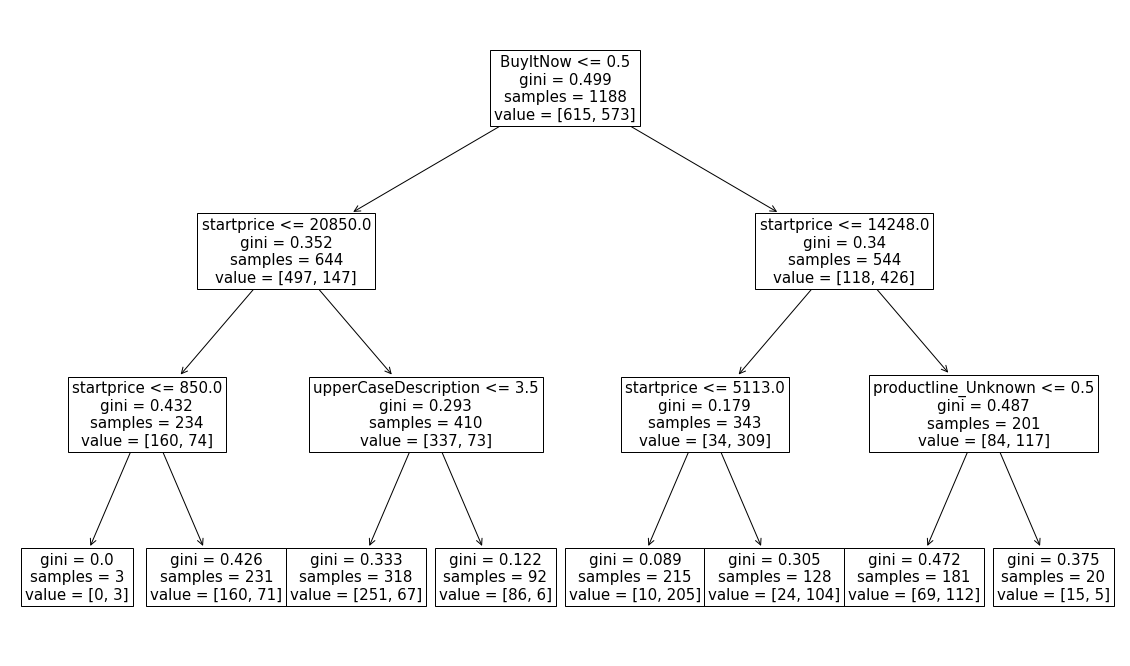

In [54]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,12))
plot_tree(model, feature_names=X_train.columns, fontsize=15)

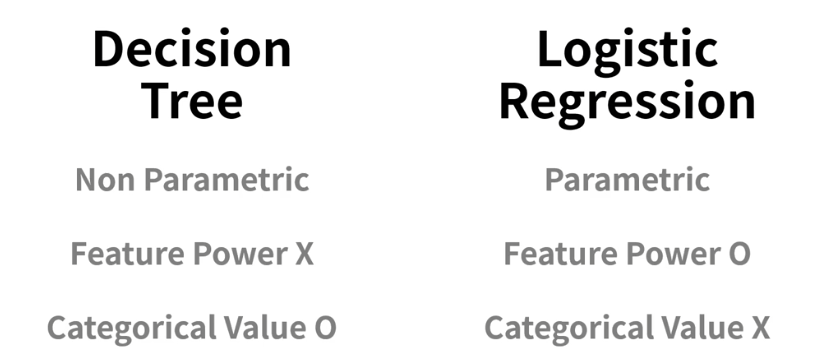

Parametric : 데이터와 target의 관계가 선형적인 관계가 있는지 없는지를 의미한다.  
Feature Power : feature의 중요도를 나타내주는 것으로 로지스틱 회귀의 경우, p-value의 통계적인 정보까지 함께 제공해준다는 특징이 있다.  
Categorical Value : Categorical 데이터를 넣으면 Decision Tree는 학습할 수 있지만, Logisitic은 불가능하다.  